In [1]:
import pandas as pd
import numpy as np  

In [16]:
orders = pd.read_csv(r'C:\Users\MANYAM TEJA\Desktop\JAR\List_of_Orders_55FFC79CF8.csv')
order_details = pd.read_csv(r'C:\Users\MANYAM TEJA\Desktop\JAR\Order_Details_19795F61CF.csv')
sales_target = pd.read_csv(r'C:\Users\MANYAM TEJA\Desktop\JAR\Sales_target_DD2E9B96A0.csv')
# Display the first few rows of each dataset to verify the import
print("Orders:")
print(orders.head())
print("\nOrder Details:")
print(order_details.head())
print("\nSales Target:")
print(sales_target.head())


Orders:
  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata

Order Details:
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones

Sales Target:
  Month of Order Date   Category   Target
0              Apr-18  Furniture  10400.0
1              May-18  Furniture  10500.0
2              Jun-18  Furniture  10600.0
3      

In [12]:
# Calculate the total sales (Amount) for each category across all orders. 
import pandas as pd
merged_df = pd.merge(orders, order_details, on='Order ID', how='inner')
category_sales = merged_df.groupby('Category')['Amount'].sum()
print("\nTotal Sales by Category:")
category_sales



Total Sales by Category:


Category
Clothing       139054.0
Electronics    165267.0
Furniture      127181.0
Name: Amount, dtype: float64

In [13]:
# Calculate profit per order and total profit margin by category
merged_df['Profit'] = merged_df['Amount'] - merged_df['Profit'] # Assuming 'Profit' column represents cost

category_analysis = merged_df.groupby('Category').agg(
    Average_Profit_per_Order=('Profit', 'mean'),
    Total_Profit=('Profit', 'sum'),
    Total_Amount=('Amount', 'sum')
)
category_analysis['Profit_Margin'] = (category_analysis['Total_Profit'] / category_analysis['Total_Amount']) * 100

print("\nCategory Analysis:")
category_analysis



Category Analysis:


,Average_Profit_per_Order,Total_Profit,Total_Amount,Profit_Margin
Category,,,,
Clothing,134.763962,127891.0,139054.0,91.972183
Electronics,502.509740,154773.0,165267.0,93.650275
Furniture,513.921811,124883.0,127181.0,98.193126


In [14]:
# Calculate performance metrics
category_performance = category_analysis.copy()
category_performance['Performance_Score'] = (category_performance['Profit_Margin'] * 0.6) + (category_performance['Average_Profit_per_Order'] * 0.4)  # Adjust weights as needed

# Identify top and bottom performers
top_performers = category_performance.nlargest(3, 'Performance_Score')  # Get top 3
bottom_performers = category_performance.nsmallest(3, 'Performance_Score')  # Get bottom 3

print("\nTop Performing Categories:")
print(top_performers)

print("\nBottom Performing Categories:")
print(bottom_performers)

# Suggestions for performance differences (replace with actual insights)
print("\nPotential Reasons for Performance Differences:")

for category in top_performers.index:
    print(f"- {category}: High profit margin and average profit per order might indicate strong demand, effective pricing, or lower operational costs.")

for category in bottom_performers.index:
    print(f"- {category}:  Low profit margin or average profit per order could suggest factors like high competition, inefficient operations,  or ineffective pricing strategies.  Further investigation into sales volume, discounts, or return rates is recommended.")



Top Performing Categories:
             Average_Profit_per_Order  Total_Profit  Total_Amount  \
Category                                                            
Furniture                  513.921811      124883.0      127181.0   
Electronics                502.509740      154773.0      165267.0   
Clothing                   134.763962      127891.0      139054.0   

             Profit_Margin  Performance_Score  
Category                                       
Furniture        98.193126         264.484600  
Electronics      93.650275         257.194061  
Clothing         91.972183         109.088895  

Bottom Performing Categories:
             Average_Profit_per_Order  Total_Profit  Total_Amount  \
Category                                                            
Clothing                   134.763962      127891.0      139054.0   
Electronics                502.509740      154773.0      165267.0   
Furniture                  513.921811      124883.0      127181.0   

         

In [15]:
# Filter data for the Furniture category
furniture_sales = sales_target[sales_target['Category'] == 'Furniture']

# Sort by month to ensure correct calculation
# furniture_sales = furniture_sales.sort_values('Month') 
furniture_sales = furniture_sales.sort_values('Month of Order Date') # Changed column name to 'Month of Order Date'

# Calculate month-over-month percentage change in target sales
furniture_sales['Percentage_Change'] = furniture_sales['Target'].pct_change() * 100

print(furniture_sales[['Month of Order Date', 'Target', 'Percentage_Change']]) # Changed column name in the final output as well

   Month of Order Date   Target  Percentage_Change
0               Apr-18  10400.0                NaN
4               Aug-18  10900.0           4.807692
8               Dec-18  11400.0           4.587156
10              Feb-19  11600.0           1.754386
9               Jan-19  11500.0          -0.862069
3               Jul-18  10800.0          -6.086957
2               Jun-18  10600.0          -1.851852
11              Mar-19  11800.0          11.320755
1               May-18  10500.0         -11.016949
7               Nov-18  11300.0           7.619048
6               Oct-18  11100.0          -1.769912
5               Sep-18  11000.0          -0.900901


In [67]:
%pip install set_matplotlib_close
%pip install set_matplotlib_formats
%pip install matplotlib as plt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement set_matplotlib_close (from versions: none)
ERROR: No matching distribution found for set_matplotlib_close

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement set_matplotlib_formats (from versions: none)
ERROR: No matching distribution found for set_matplotlib_formats

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Function to analyze target fluctuations and suggest strategies
def analyze_target_fluctuations(sales_data, category):
    """
    Analyzes target fluctuations for a given category and suggests strategies.
    """
    category_sales = sales_data[sales_data['Category'] == category].copy()
    category_sales = category_sales.sort_values('Month of Order Date')
    category_sales['Percentage_Change'] = category_sales['Target'].pct_change() * 100
    
    # Identify months with significant fluctuations
    significant_fluctuation_threshold = 15  # Example threshold (adjust as needed)
    significant_fluctuations = category_sales[abs(category_sales['Percentage_Change']) > significant_fluctuation_threshold]

    print(f"\nSignificant Target Fluctuations for {category}:")
    print(significant_fluctuations[['Month of Order Date', 'Target', 'Percentage_Change']])

    # Suggest strategies based on fluctuations
    if not significant_fluctuations.empty:
        print("\nSuggested Strategies:")
        for index, row in significant_fluctuations.iterrows():
            month = row['Month of Order Date']
            percentage_change = row['Percentage_Change']

            if percentage_change > significant_fluctuation_threshold:
                print(f"- {month}: Target increased significantly. Investigate reasons (e.g., new product launch, marketing campaign). Ensure resources are allocated appropriately. Consider if the increase is realistic based on past performance and market conditions.")
            else:
                print(f"- {month}: Target decreased significantly. Analyze reasons (e.g., seasonal decline, economic downturn, competitor activity). Adjust strategies, reduce costs where possible, and consider revising sales tactics.")
    else:
        print(f"\nNo significant target fluctuations detected for {category} above the {significant_fluctuation_threshold}% threshold.")

# Example usage (analyze fluctuations for 'Furniture')
analyze_target_fluctuations(sales_target, 'Furniture')



Significant Target Fluctuations for Furniture:
Empty DataFrame
Columns: [Month of Order Date, Target, Percentage_Change]
Index: []

No significant target fluctuations detected for Furniture above the 15% threshold.


In [69]:
# prompt: From the List of Orders dataset, identify the top 5 states with the highest order 
# count. For each of these states, calculate the total sales and average profit. 

# Group by state and count orders
state_order_counts = orders.groupby('State')['Order ID'].count()

# Get the top 5 states with the highest order counts
top_5_states = state_order_counts.nlargest(5)

print("Top 5 States with Highest Order Counts:\n", top_5_states)

# Now calculate total sales and average profit for each of the top 5 states
top_5_states_data = merged_df[merged_df['State'].isin(top_5_states.index)]

state_analysis = top_5_states_data.groupby('State').agg(
    Total_Sales=('Amount', 'sum'),
    Average_Profit=('Profit', 'mean')
)


print("\nTotal Sales and Average Profit for Top 5 States:\n", state_analysis)


Top 5 States with Highest Order Counts:
 State
Madhya Pradesh    101
Maharashtra        90
Rajasthan          32
Gujarat            27
Punjab             25
Name: Order ID, dtype: int64

Total Sales and Average Profit for Top 5 States:
                 Total_Sales  Average_Profit
State                                      
Gujarat             21058.0      236.701149
Madhya Pradesh     105140.0      292.908824
Maharashtra         95348.0      307.489655
Punjab              16786.0      289.916667
Rajasthan           21149.0      268.810811


In [70]:

print("\nRegional Sales Analysis (based on State):")
print(state_analysis)

# Identify underperforming regions
underperforming_states = state_analysis[state_analysis['Total_Sales'] < state_analysis['Total_Sales'].mean()]
print("\nUnderperforming States (Total Sales below average):\n", underperforming_states)


# Prioritize regions for improvement based on sales and profit
prioritized_regions = state_analysis.sort_values(by=['Total_Sales', 'Average_Profit'], ascending=[True, True])
print("\nPrioritized Regions for Improvement (Lowest Total Sales and Average Profit):\n", prioritized_regions.head(3)) # Prioritize the bottom 3




Regional Sales Analysis (based on State):
                Total_Sales  Average_Profit
State                                      
Gujarat             21058.0      236.701149
Madhya Pradesh     105140.0      292.908824
Maharashtra         95348.0      307.489655
Punjab              16786.0      289.916667
Rajasthan           21149.0      268.810811

Underperforming States (Total Sales below average):
            Total_Sales  Average_Profit
State                                 
Gujarat        21058.0      236.701149
Punjab         16786.0      289.916667
Rajasthan      21149.0      268.810811

Prioritized Regions for Improvement (Lowest Total Sales and Average Profit):
            Total_Sales  Average_Profit
State                                 
Punjab         16786.0      289.916667
Gujarat        21058.0      236.701149
Rajasthan      21149.0      268.810811


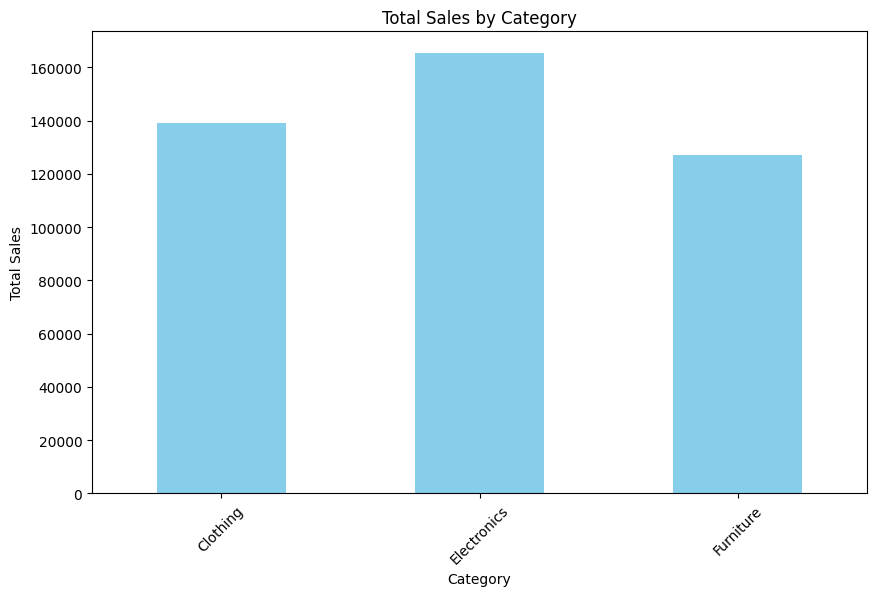

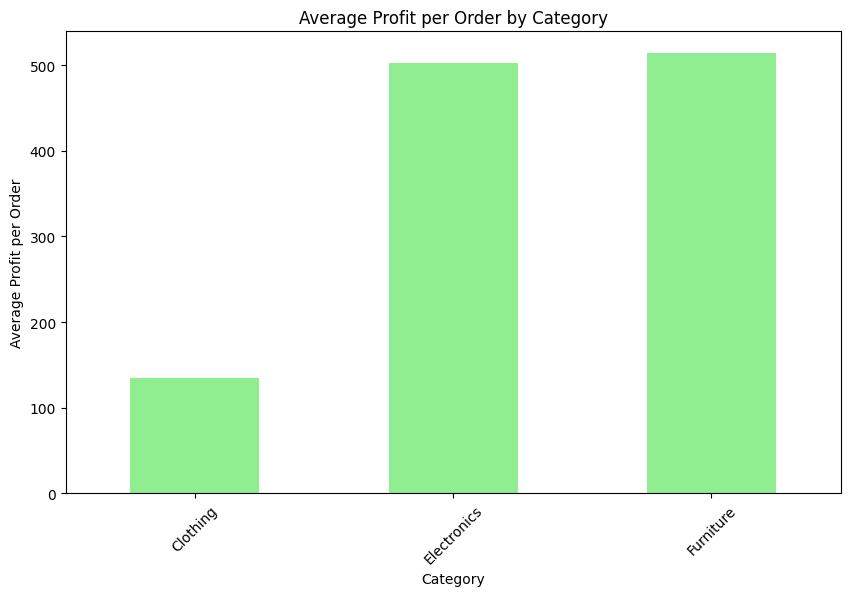

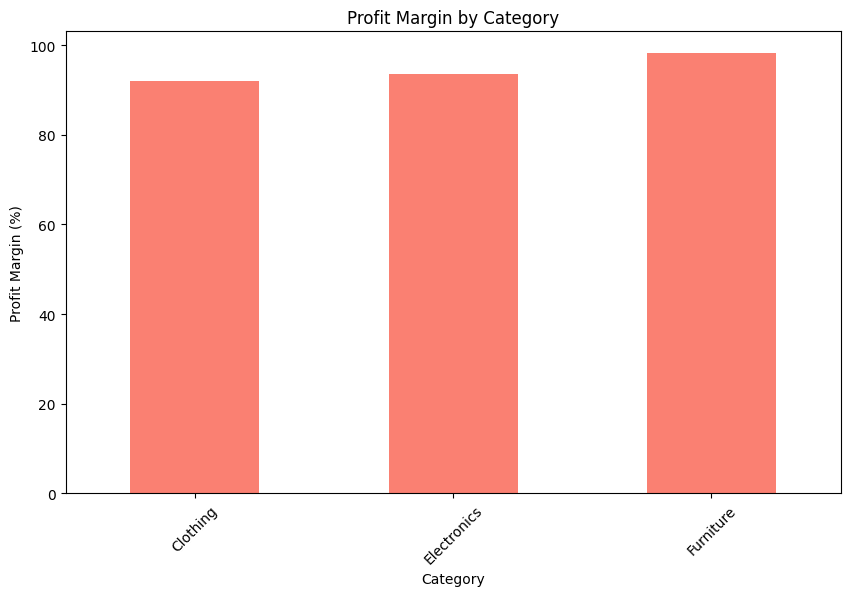

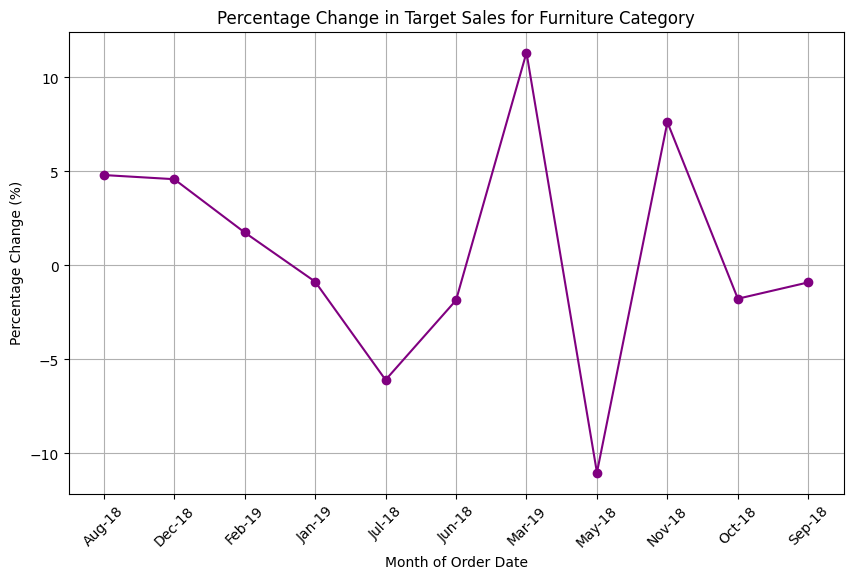

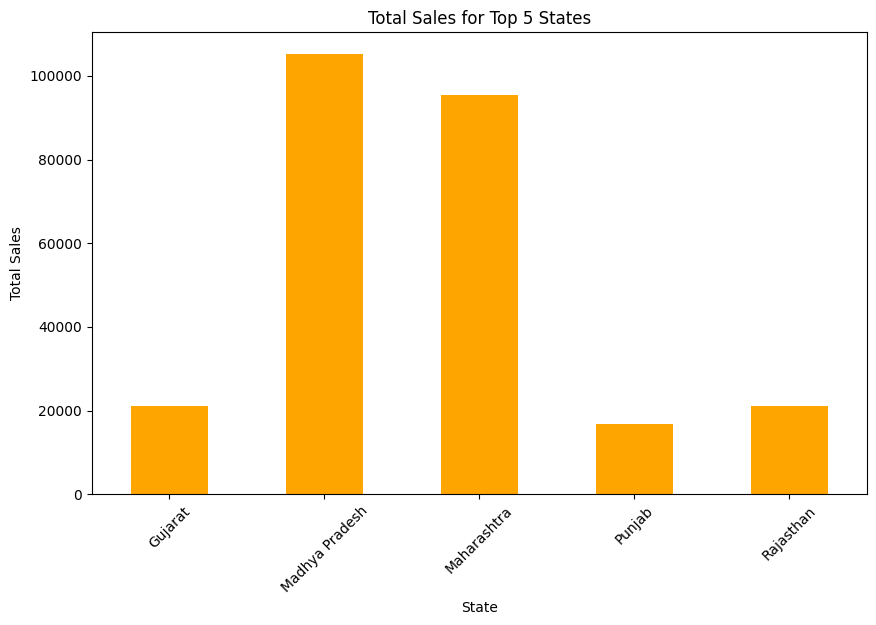

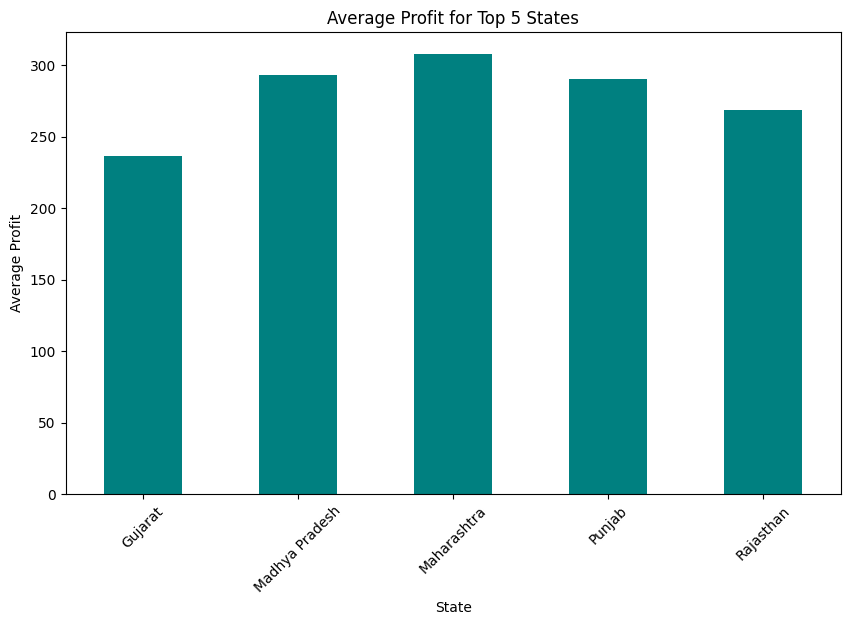

In [71]:
import matplotlib.pyplot as plt

# Part 1: Sales and Profitability Analysis
# Plot total sales by category
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Plot average profit per order by category
plt.figure(figsize=(10, 6))
category_analysis['Average_Profit_per_Order'].plot(kind='bar', color='lightgreen')
plt.title('Average Profit per Order by Category')
plt.xlabel('Category')
plt.ylabel('Average Profit per Order')
plt.xticks(rotation=45)
plt.show()

# Plot profit margin by category
plt.figure(figsize=(10, 6))
category_analysis['Profit_Margin'].plot(kind='bar', color='salmon')
plt.title('Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()

# Part 2: Target Achievement Analysis
# Plot percentage change in target sales for Furniture category
plt.figure(figsize=(10, 6))
plt.plot(furniture_sales['Month of Order Date'], furniture_sales['Percentage_Change'], marker='o', linestyle='-', color='purple')
plt.title('Percentage Change in Target Sales for Furniture Category')
plt.xlabel('Month of Order Date')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Part 3: Regional Performance Insights
# Plot total sales for top 5 states
plt.figure(figsize=(10, 6))
state_analysis['Total_Sales'].plot(kind='bar', color='orange')
plt.title('Total Sales for Top 5 States')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Plot average profit for top 5 states
plt.figure(figsize=(10, 6))
state_analysis['Average_Profit'].plot(kind='bar', color='teal')
plt.title('Average Profit for Top 5 States')
plt.xlabel('State')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.show()